# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset given
import requests
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
#first few rows of the dataset
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
#shape of the dataset
df.shape

(907, 27)

There are 907 rows of data for 27 columns

In [5]:
#columns in the dataset
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
#data types of all the features of the datset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The database includes the following indicators:
    
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    
•	`country_long` (text): longer form of the country designation
    
•	`name` (text): name or title of the power plant, generally in Romanized form
    
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
    
•	`capacity_mw` (number): electrical generating capacity in megawatts
    
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
•	`primary_fuel` (text): energy source used in primary electricity generation or export
    
•	`other_fuel1` (text): energy source used in electricity generation or export
    
•	`other_fuel2` (text): energy source used in electricity generation or export
    
•	`other_fuel3` (text): energy source used in electricity generation or export
    
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
    
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    
•	`url` (text): web document corresponding to the `source` field
    
•	`geolocation_source` (text): attribution for geolocation information
    
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
•	`year_of_capacity_data` (number): year the capacity information was reported
    
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    
•	`generation_data_source` (text): attribution for the reported generation information
    
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014
    
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015
    
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016
    
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017
    
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014
    
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There are 12 object and 15 numerical columns in data

# DATA CLEANING

In [8]:
#checking for missing values in the dataset
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are many null values in the dataset

wepp_id, estimated_generation_gwh, generation_gwh_2013, other_fuel3, other_fuel2 are completely Null Values. So first we will drop these columns

In [9]:
df.drop(['estimated_generation_gwh',"generation_gwh_2019",'wepp_id','other_fuel3','other_fuel2', 'generation_gwh_2013'],axis=1,inplace=True)

In [10]:
df.shape

(907, 21)

other_fuel1 column is also having more than 60% null data, so we can drop this

In [11]:
df.drop(['other_fuel1'],axis=1,inplace=True)

In [12]:
df.shape

(907, 20)

In [13]:
df.duplicated().any()

False

In [14]:
df.isin(['NAN','NA','N/A','-',' ','?','--']).sum().any()

False

No duplicate rows or no white spaces present in the dataset

<AxesSubplot:>

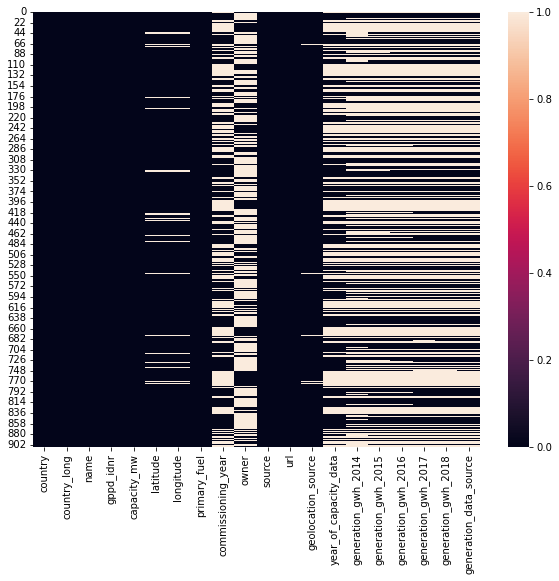

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [16]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

There are still many null values in the dataset

In [17]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Lets check the object data type columns

In [18]:
df['country'].unique

<bound method Series.unique of 0      IND
1      IND
2      IND
3      IND
4      IND
      ... 
902    IND
903    IND
904    IND
905    IND
906    IND
Name: country, Length: 907, dtype: object>

In [19]:
df['country'].nunique()

1

In [20]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In [21]:
df['country_long'].unique()

array(['India'], dtype=object)

In [22]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [23]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

generation_data_source,year_of_capacity_data,country_long & country columns have only one unique attribute/data , so we can drop this also

In [24]:
df.drop(['generation_data_source','year_of_capacity_data','country_long','country'],axis=1,inplace=True)

In [25]:
df.shape

(907, 16)

In [26]:
df['geolocation_source'].nunique()

3

In [27]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   gppd_idnr            907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   latitude             861 non-null    float64
 4   longitude            861 non-null    float64
 5   primary_fuel         907 non-null    object 
 6   commissioning_year   527 non-null    float64
 7   owner                342 non-null    object 
 8   source               907 non-null    object 
 9   url                  907 non-null    object 
 10  geolocation_source   888 non-null    object 
 11  generation_gwh_2014  398 non-null    float64
 12  generation_gwh_2015  422 non-null    float64
 13  generation_gwh_2016  434 non-null    float64
 14  generation_gwh_2017  440 non-null    float64
 15  generation_gwh_2018  448 non-null    flo

In [29]:
df['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [30]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

We can also remove the name and gppd_idnr columns, as they are irrelevent for analysis

In [31]:
df.drop(['gppd_idnr','name'],axis=1,inplace=True)

In [32]:
df.shape

(907, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   owner                342 non-null    object 
 6   source               907 non-null    object 
 7   url                  907 non-null    object 
 8   geolocation_source   888 non-null    object 
 9   generation_gwh_2014  398 non-null    float64
 10  generation_gwh_2015  422 non-null    float64
 11  generation_gwh_2016  434 non-null    float64
 12  generation_gwh_2017  440 non-null    float64
 13  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(5)
memory usage: 99.3+ KB


In [34]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


url column can also be dropped, as its not relevant for analysis

In [35]:
df.drop(['url'],axis=1,inplace=True)

In [36]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


# Handling Null Values

Lets fill the Null values of categorical data with mode and Numerical with mean

In [37]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [38]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [39]:
df.generation_gwh_2014

0              NaN
1              NaN
2              NaN
3       617.789264
4      3035.550000
          ...     
902            NaN
903            NaN
904            NaN
905            NaN
906            NaN
Name: generation_gwh_2014, Length: 907, dtype: float64

In [40]:
#Replacing the null values im the longitude column with the column mean
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())

In [41]:
#As we can see that for the year 2014 there is generation of 3300GWH for a 5th Row, But the plant was commissioned in 2015, 
# So technically the generation for the year 2014 to be Zero, So replacing all the places where the commisioning year is later to 2014
df['generation_gwh_2014'] = np.where(df['commissioning_year']>2014,0,df.generation_gwh_2014)

Apllying the same for all the other years, one by one

In [42]:
df['generation_gwh_2015'] = np.where(df['commissioning_year']>2015,0,df.generation_gwh_2015)

In [43]:
df['generation_gwh_2016'] = np.where(df['commissioning_year']>2016,0,df.generation_gwh_2016)

In [44]:
df['generation_gwh_2017'] = np.where(df['commissioning_year']>2017,0,df.generation_gwh_2017)

In [45]:
df['generation_gwh_2018'] = np.where(df['commissioning_year']>2018,0,df.generation_gwh_2018)

In [46]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,2001.0,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,0.000000,5916.370,6243.000000,5385.579736,7279.000000


In [47]:
df.groupby(["primary_fuel"])['generation_gwh_2014'].mean(163)

primary_fuel
Biomass            NaN
Coal       3968.732633
Gas         703.506603
Hydro       707.929538
Nuclear    4313.938571
Oil         130.881366
Solar         0.000000
Wind               NaN
Name: generation_gwh_2014, dtype: float64

In [48]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year       0
owner                  565
source                   0
geolocation_source       0
generation_gwh_2014    459
generation_gwh_2015    458
generation_gwh_2016    458
generation_gwh_2017    465
generation_gwh_2018    459
dtype: int64

In [49]:
# filling null values with mean in numerical columns
#df['latitude'].fillna(df['latitude'].mean()[0], inplace=True)

df['latitude'] = df['latitude'].fillna(df['latitude'].mean())


In [50]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude               46
primary_fuel             0
commissioning_year       0
owner                  565
source                   0
geolocation_source       0
generation_gwh_2014    459
generation_gwh_2015    458
generation_gwh_2016    458
generation_gwh_2017    465
generation_gwh_2018    459
dtype: int64

In [51]:
#Replacing the null values im the longitude column with the column mean
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

In [52]:
#Replacing the null values im the longitude column with the column mean
df['owner'] = df['owner'].fillna(df['owner'].mode())

In [53]:
df['owner'].mode()

0                      Acc Acc ltd
1                    Jk Cement ltd
2    Sterling Agro Industries ltd.
Name: owner, dtype: object

In [54]:
df.groupby(["primary_fuel"])['generation_gwh_2014'].mean()

primary_fuel
Biomass            NaN
Coal       3968.732633
Gas         703.506603
Hydro       707.929538
Nuclear    4313.938571
Oil         130.881366
Solar         0.000000
Wind               NaN
Name: generation_gwh_2014, dtype: float64

In [55]:
df[df['primary_fuel'] == 'Biomass']['generation_gwh_2014'].notnull().sum()

0

In [56]:
df[df['primary_fuel'] == 'Wind']['generation_gwh_2014'].notnull().sum()

0

In [57]:
df[df['primary_fuel'] == 'Solar']['generation_gwh_2014'].notnull().sum()

1

In [58]:
df[df['primary_fuel'] == 'Solar']['generation_gwh_2014'].unique()

array([nan,  0.])

In [59]:
df.groupby(["primary_fuel"])['generation_gwh_2015'].mean()

primary_fuel
Biomass            NaN
Coal       4325.426593
Gas         796.703115
Hydro       663.332380
Nuclear    4234.875000
Oil          21.710086
Solar              NaN
Wind               NaN
Name: generation_gwh_2015, dtype: float64

Different fuel based power plants will generate differently, Solar, wind nd oil will be lesser capacity than Coal, Nuclear and Hydro


so we will replace the null values in generation_gwh_2014 column with corresponding mean values of the Primary_fuel column

In [60]:
#Calculating the mean values inb the column, w.r.t Primary fuel column
fuel_means = df.groupby('primary_fuel')['generation_gwh_2014'].mean()

In [61]:
fill_values = dict(fuel_means)

In [62]:
df['generation_gwh_2014'] = df.apply(lambda x: fill_values[x['primary_fuel']] if pd.isnull(x['generation_gwh_2014']) else x['generation_gwh_2014'], axis=1)


In [63]:
#Replacing the null values im the generation 2014 column with the column mean
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())

Now we will repeat the same for other years also

In [64]:
#Calculating the mean values inb the column, w.r.t Primary fuel column
fuel_means5 = df.groupby('primary_fuel')['generation_gwh_2015'].mean()

In [65]:
fill_values5 = dict(fuel_means5)

In [66]:
df['generation_gwh_2015'] = df.apply(lambda x: fill_values5[x['primary_fuel']] if pd.isnull(x['generation_gwh_2015']) else x['generation_gwh_2015'], axis=1)

In [67]:
#Replacing the null values im the generation 2015 column with the column mean
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())

In [68]:
#Calculating the mean values inb the column, w.r.t Primary fuel column
fuel_means6 = df.groupby('primary_fuel')['generation_gwh_2016'].mean()

In [69]:
fill_values6 = dict(fuel_means6)

In [70]:
df['generation_gwh_2016'] = df.apply(lambda x: fill_values6[x['primary_fuel']] if pd.isnull(x['generation_gwh_2016']) else x['generation_gwh_2016'], axis=1)

In [71]:
#Replacing the null values im the generation 2016 column with the column mean
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())

In [72]:
#Calculating the mean values inb the column, w.r.t Primary fuel column
fuel_means7 = df.groupby('primary_fuel')['generation_gwh_2017'].mean()

In [73]:
fill_values7 = dict(fuel_means7)

In [74]:
df['generation_gwh_2017'] = df.apply(lambda x: fill_values7[x['primary_fuel']] if pd.isnull(x['generation_gwh_2017']) else x['generation_gwh_2017'], axis=1)

In [75]:
#Replacing the null values im the generation 2017 column with the column mean
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

In [76]:
#Calculating the mean values inb the column, w.r.t Primary fuel column
fuel_means8 = df.groupby('primary_fuel')['generation_gwh_2018'].mean()

In [77]:
fill_values8 = dict(fuel_means8)

In [78]:
df['generation_gwh_2018'] = df.apply(lambda x: fill_values8[x['primary_fuel']] if pd.isnull(x['generation_gwh_2018']) else x['generation_gwh_2018'], axis=1)

In [79]:
#Replacing the null values im the generation 2018 column with the column mean
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [80]:
df.drop(['owner'],axis=1,inplace=True)

Now all the Null values are handled and filled with mean and mode

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [82]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1998.728776,1759.684419,2266.848567,2377.742988,2506.397811,2605.373790
std,590.085456,6.079148,4.812291,13.158621,2902.794040,2991.063571,3010.835054,3058.459586,3164.223177
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,37.063750,561.666900,643.696325,690.083887,661.569650
50%,59.200000,21.281800,76.979200,2001.000000,707.929538,2266.848567,2377.742988,2506.397811,2605.373790
75%,385.250000,25.176450,79.206100,2003.000000,1759.684419,2266.848567,2377.742988,2506.397811,2605.373790
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


<AxesSubplot:>

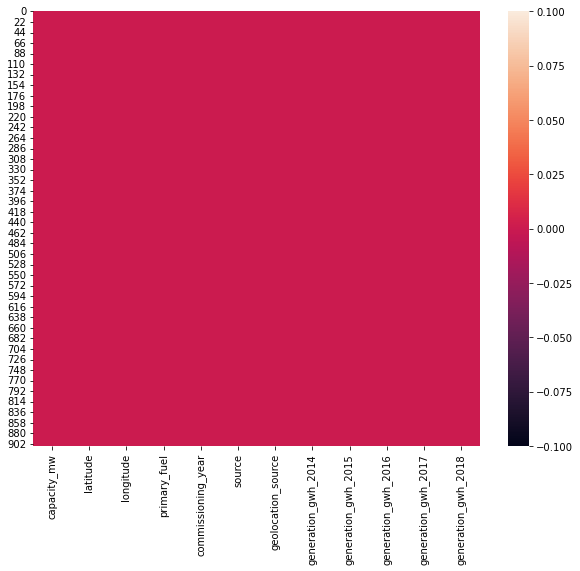

In [83]:
#heat map for dataset null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

Now there are no Null values nor Blank/white Sapces

# DATA ANALYSIS

In [84]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [85]:
df['capacity_mw'].nunique()

361

In [86]:
df['latitude'].nunique()

837

In [87]:
df['primary_fuel'].nunique()

8

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

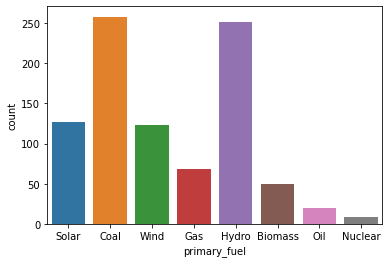

In [88]:
#bar plot for 'primary_fuel' feature
sns.countplot(x='primary_fuel',data=df)

There are 8 types of primary fuel and they are : Solar, Coal,Wind,Gas,Hydro,Biomass,Oil, Nuclear

Coal and Hydro are the major in Primary fuel followed by solar and wind

<AxesSubplot:xlabel='capacity_mw', ylabel='count'>

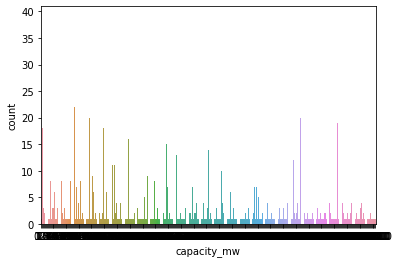

In [89]:
sns.countplot(x=df['capacity_mw'],data=df)

In [90]:
df['commissioning_year'].nunique()

73

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1927.0'),
  Text(1, 0, '1937.0'),
  Text(2, 0, '1939.0'),
  Text(3, 0, '1943.0'),
  Text(4, 0, '1946.0'),
  Text(5, 0, '1949.0'),
  Text(6, 0, '1952.0'),
  Text(7, 0, '1953.0'),
  Text(8, 0, '1954.0'),
  Text(9, 0, '1955.0'),
  Text(10, 0, '1956.0'),
  Text(11, 0, '1957.0'),
  Text(12, 0, '1958.0'),
  Text(13, 0, '1959.0'),
  Text(14, 0, '1960.0'),
  Text(15, 0, '1961.0'),
  Text(16, 0, '1962.0'),
  Text(17, 0, '1963.0'),
  Text(18, 0, '1964.0'),
  Text(19, 0, '1965.0'),
  Text(20, 0, '1966.0'),
  Text(21, 0, '1967.0'),
  Text(22, 0, '1968.0'),
  Text(23, 0, '1969.0'),
  Text(24, 0, '1970.0'),
  Text(25, 0, '1971.0'),
  Text(26, 0, '1972.0'),
 

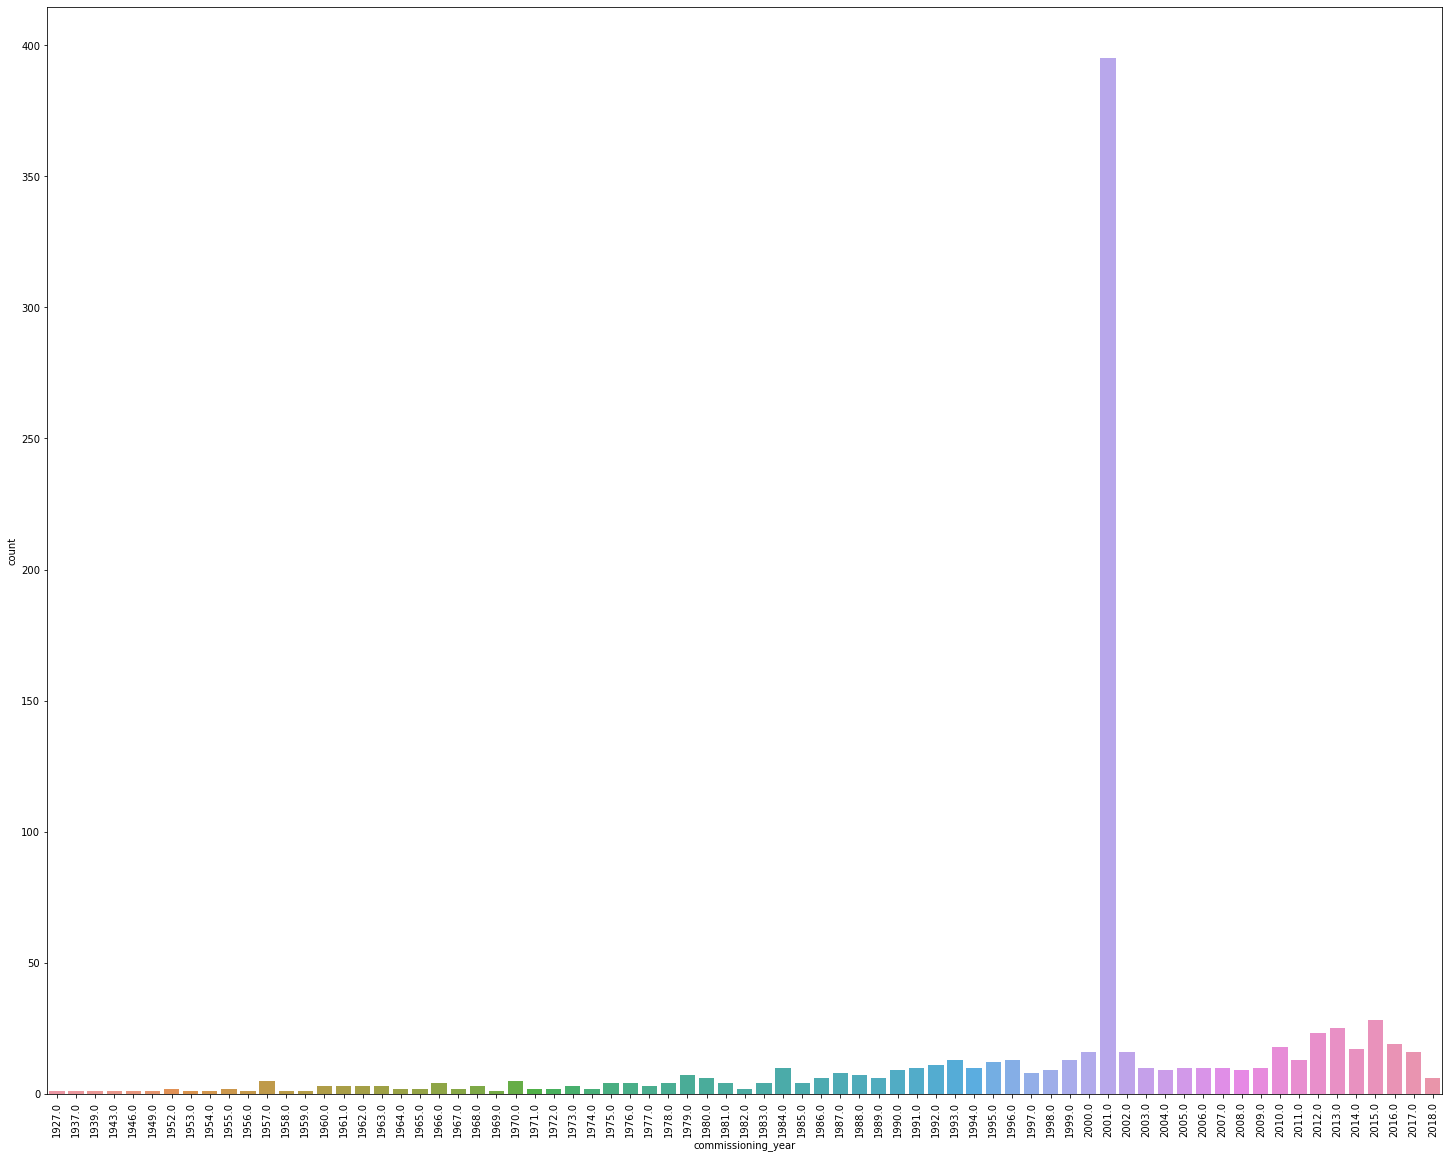

In [91]:
plt.figure(figsize=(25,20))
sns.countplot(x=df['commissioning_year'],data=df)
plt.xticks(rotation=90)

From the above graph, we can see that there is an outlier in commisioning year which is 2001

2001 is the median., which we filled the null values with median

In [92]:
#assigning correlarion data to a variable
dfcorr=df.corr()

<AxesSubplot:>

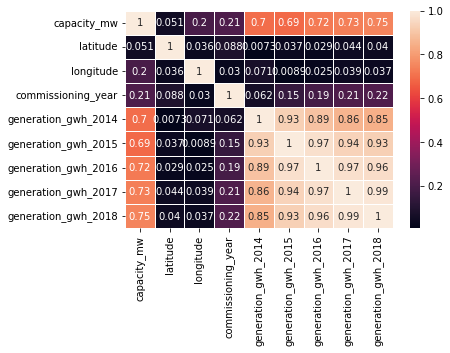

In [93]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

we can see that the capacity_Mw is highly positive correlated with 2014,15,16,17,18 years generation

and slightly correlated with latitude and longitude

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

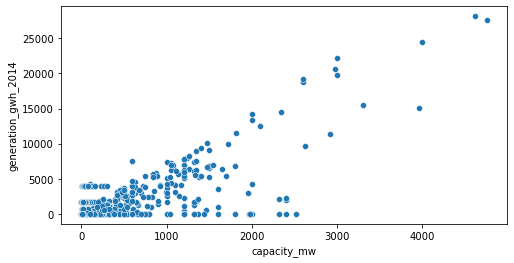

In [94]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

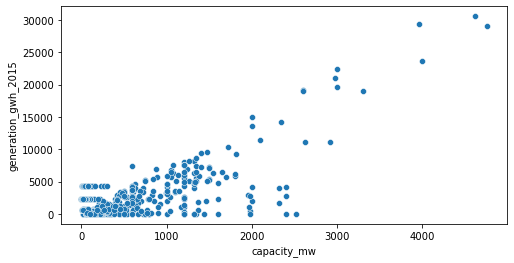

In [95]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

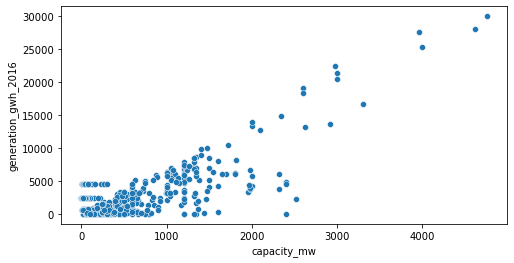

In [96]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

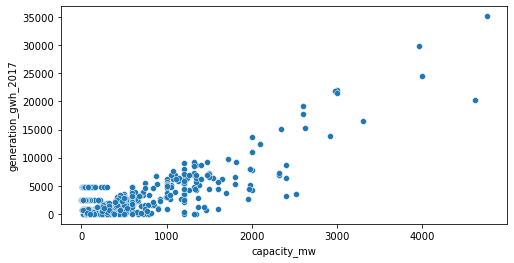

In [97]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

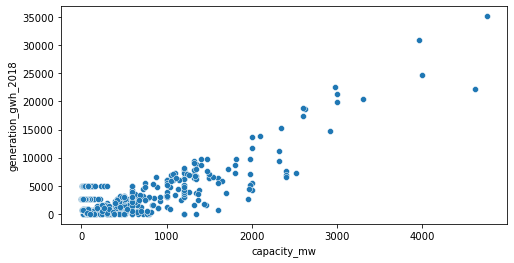

In [98]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)

From above scatter plots we can see that the generation in every year is increasing with increasing capacity

# Fuel vs Generation

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

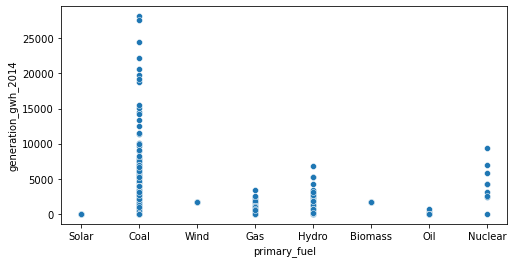

In [99]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

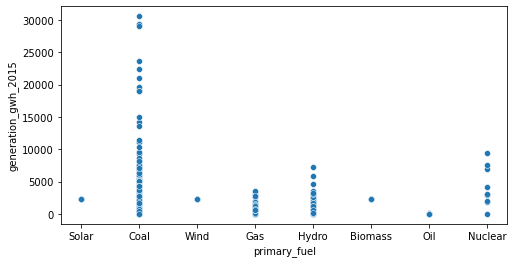

In [100]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

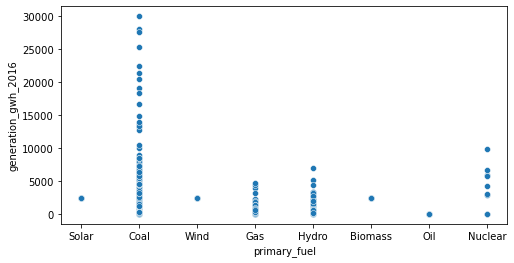

In [101]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

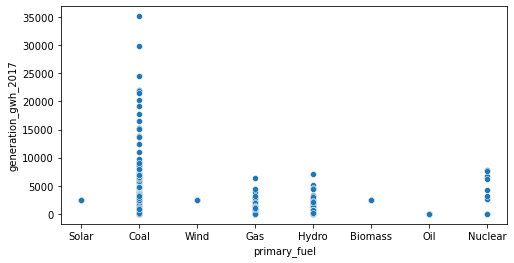

In [102]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

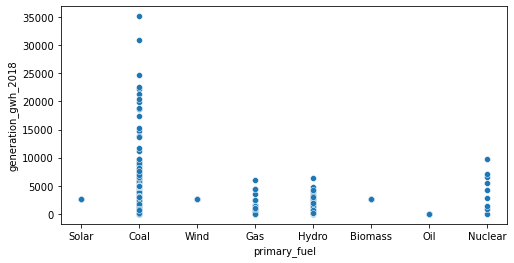

In [103]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=df)

From above plots we can see that the coal is the major fuel for prodcing electricity in every year

Nuclear, Hydro and Gas are next to the Coal

Solar is in the increasing trend, but not much significant, when compared to Coal

# Capacity Vs Fuel

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

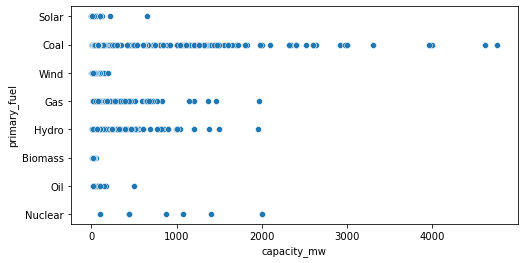

In [104]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

Coal Based power plants are with higher capacity and followed by Nuclear, Hydro and Gas

Renewable sources like wind, solar are less in capacity

# Using Label Encoder for converting categorical columns

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


We have 3 categorical colummns : Primary fuel, source and geolocation_Source

In [107]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [108]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [109]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [110]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [111]:
#checking whether data encoded or not
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [112]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


Now all the data is converted to Numerical

# Checking for Outliers

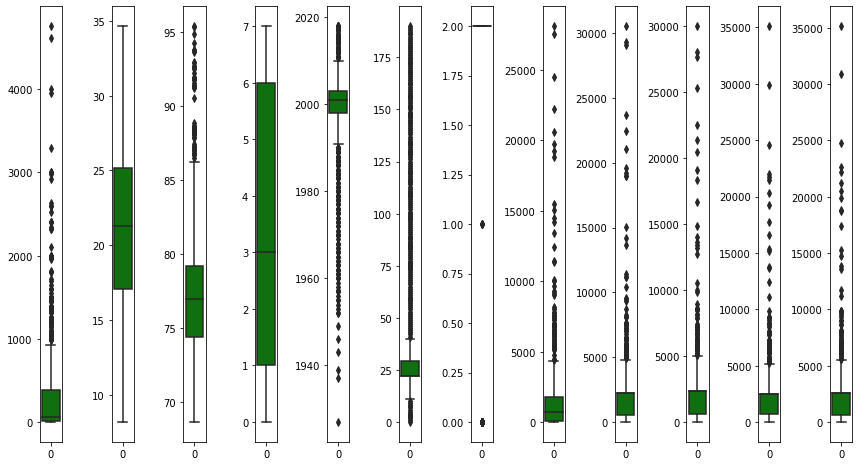

In [114]:
#checking with Boxplots
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(df.columns)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[df.columns[i]],color='green',orient='v')
    plt.tight_layout()

Almost all the columns has outliers

In [115]:
#to check the distribution of the data of each column
ncol=4
nrows=3
plt.figure(figsize=(150,120))
for i in range(0,len(df.columns)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[df.columns[i]],color='blue')
    plt.tight_layout()

# Z SCORE METHOD

In [116]:
from scipy.stats import zscore

z=np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 147, 158, 209, 209,
       209, 209, 209, 209, 308, 308, 308, 308, 308, 308, 363, 364, 364,
       364, 364, 364, 364, 375, 482, 493, 493, 493, 493, 493, 493, 494,
       494, 494, 494, 494, 494, 648, 648, 648, 648, 648, 648, 657, 657,
       657, 657, 657, 657, 695, 695, 695, 695, 695, 695, 721, 721, 721,
       724, 724, 724, 724, 724, 726, 726, 726, 726, 726, 726, 767, 786,
       786, 786, 786, 786, 786, 788, 808, 808, 808, 808, 808, 808, 880,
       880, 880, 880, 880, 880], dtype=int64), array([2, 3, 4, 5, 0, 2, 3, 4, 5, 5, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 5, 0, 1, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 0, 1, 2, 3,
       4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [117]:
z = np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
threshold = 3
dfn = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", dfn.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-dfn.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (907, 12)
Shape of the dataframe after removing outliers:  (884, 12)
Percentage of data loss post outlier removal:  2.535832414553473


# IQR Method

In [118]:
variables = df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]

#1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

#IQR
IQR=Q3 - Q1
dfs=df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [119]:
dfs.shape

(785, 12)

In [120]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", dfs.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-dfs.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (907, 12)
Shape of the dataframe after removing outliers:  (785, 12)
Percentage of data loss post outlier removal:  13.45093715545755


IN IQR method there is data loss of 13%, so we will continue with the Z SCORE method, where data loss is 2%

# Skewness handling

In [121]:
dfn.skew()

capacity_mw            2.040041
latitude              -0.135991
longitude              1.201208
primary_fuel           0.431767
commissioning_year    -1.721817
source                 1.786203
geolocation_source    -2.116425
generation_gwh_2014    1.755910
generation_gwh_2015    1.256461
generation_gwh_2016    1.204320
generation_gwh_2017    1.070550
generation_gwh_2018    1.068172
dtype: float64

skewness more than+/- 0.5 will we treated, for only numerical columns

In [122]:
from sklearn.preprocessing import power_transform

collist = ['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',"generation_gwh_2018"]

dfn[collist]=power_transform(dfn[collist],method='yeo-johnson')

dfn[collist]

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.689394,-1.497288,0.461380,0.453518,0.444274,0.448074
1,0.242377,1.176921,1.197614,1.216912,1.236501,1.253785
2,-0.260103,0.646412,0.461380,0.453518,0.444274,0.448074
3,0.416289,0.092868,-0.357342,-0.378833,-0.631304,-0.699775
4,1.772887,-1.497288,1.627941,1.655761,1.386767,1.808702
...,...,...,...,...,...,...
902,1.713273,-1.497288,-1.956734,-1.088975,-0.460613,-0.644352
903,-1.608549,-1.497288,0.461380,0.453518,0.444274,0.448074
904,-0.496946,0.646412,0.461380,0.453518,0.444274,0.448074
905,0.131637,1.176921,1.197614,1.216912,1.236501,1.253785


In [123]:
dfn.skew()

capacity_mw            0.016627
latitude              -0.135991
longitude              1.201208
primary_fuel           0.431767
commissioning_year    -1.721817
source                 1.786203
geolocation_source    -2.116425
generation_gwh_2014   -0.368179
generation_gwh_2015   -0.350578
generation_gwh_2016   -0.332959
generation_gwh_2017   -0.329411
generation_gwh_2018   -0.318851
dtype: float64

# Splitting the data into X and Y

In [124]:
x=dfn.drop(['capacity_mw'],axis=1)
y=dfn['capacity_mw']

In [125]:
x.shape

(884, 11)

In [126]:
y.shape

(884,)

# Scaling input(X) values

In [127]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [128]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [129]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,0.490825,0.326734,0.466225,0.786410,0.233770,0.863122,0.438597,0.433739,0.440491,0.460355,0.466454
std,0.231885,0.179191,0.325977,0.145157,0.237259,0.342262,0.293093,0.221791,0.221807,0.228170,0.228782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.330841,0.213725,0.142857,0.777473,0.115789,1.000000,0.159674,0.290078,0.302871,0.312168,0.305508
50%,0.493323,0.307567,0.428571,0.813187,0.115789,1.000000,0.484783,0.536011,0.541027,0.561668,0.568907
75%,0.644256,0.391180,0.857143,0.824176,0.185526,1.000000,0.627948,0.536011,0.541027,0.561668,0.568907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building:

# Splitting the data for training and testing:

In [130]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression
LR=LinearRegression()

In [131]:
# Train Test Split / finding best random_state for the model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=0.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model perform very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('='*50,'\n')

At random state  19 The model perform very well
At random state:  19
Test R2 score is:  0.46
Train R2 score is:  0.46

At random state  44 The model perform very well
At random state:  44
Test R2 score is:  0.46
Train R2 score is:  0.46

At random state  70 The model perform very well
At random state:  70
Test R2 score is:  0.46
Train R2 score is:  0.46

At random state  84 The model perform very well
At random state:  84
Test R2 score is:  0.46
Train R2 score is:  0.46

At random state  97 The model perform very well
At random state:  97
Test R2 score is:  0.46
Train R2 score is:  0.46

At random state  127 The model perform very well
At random state:  127
Test R2 score is:  0.46
Train R2 score is:  0.46

At random state  141 The model perform very well
At random state:  141
Test R2 score is:  0.46
Train R2 score is:  0.46

At random state  144 The model perform very well
At random state:  144
Test R2 score is:  0.46
Train R2 score is:  0.46

At random state  159 The model perform ver

Selecting the random state 159

In [132]:
#At Random state= 159

x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=159,test_size=0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [133]:
#Importing libraries for other regressions

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [134]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [135]:
for i in model:
    i.fit(x_train,y_train)
    print('mean_absolute_error of ',i ,'model', mean_absolute_error(y_test,i.predict(x_test)))
    print('mean_square_error of',i,'model' , mean_squared_error(y_test,i.predict(x_test)))
    print('R2 Score of',i,'model', r2_score(y_test,i.predict(x_test) )*100)
    print('==' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 0.6384582625816222
mean_square_error of LinearRegression() model 0.5780094693790279
R2 Score of LinearRegression() model 46.321581727886574


mean_absolute_error of  Ridge() model 0.638078614168863
mean_square_error of Ridge() model 0.5715068110957302
R2 Score of Ridge() model 46.92546873961058


mean_absolute_error of  Lasso() model 0.8626073069724549
mean_square_error of Lasso() model 1.0999411777119357
R2 Score of Lasso() model -2.1490230521206133


mean_absolute_error of  DecisionTreeRegressor() model 0.40154827472078264
mean_square_error of DecisionTreeRegressor() model 0.2983259783338085
R2 Score of DecisionTreeRegressor() model 72.2951482721493


mean_absolute_error of  SVR() model 0.49145910418252614
mean_square_error of SVR() model 0.42098273289997523
R2 Score of SVR() model 60.90429583062087


mean_absolute_error of  KNeighborsRegressor() model 0.39500567439701895
mean_square_error of KNeighborsRegressor() model 0.2703312445553

# Cross VAlidation

In [136]:
from sklearn.model_selection import cross_val_score


for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,x,y,cv=10, scoring='neg_mean_squared_error').mean())
    print('=='*50)

mean_square of  LinearRegression() model 0.5780094693790279
cross Validation score of  LinearRegression()  is  -0.5501475261093705
mean_square of  Ridge() model 0.5715068110957302
cross Validation score of  Ridge()  is  -0.5483567025165934
mean_square of  Lasso() model 1.0999411777119357
cross Validation score of  Lasso()  is  -1.0047985119003002
mean_square of  DecisionTreeRegressor() model 0.2983259783338085
cross Validation score of  DecisionTreeRegressor()  is  -0.3808654736210196
mean_square of  SVR() model 0.42098273289997523
cross Validation score of  SVR()  is  -0.4248190806579135
mean_square of  KNeighborsRegressor() model 0.2703312445553396
cross Validation score of  KNeighborsRegressor()  is  -0.3275087114347673
mean_square of  RandomForestRegressor() model 0.20391476920580187
cross Validation score of  RandomForestRegressor()  is  -0.22064877190096213
mean_square of  ElasticNet() model 1.0999411777119357
cross Validation score of  ElasticNet()  is  -1.0047985119003002
mean_

In [137]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,x,y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('=='*50)

Root mean_square of  LinearRegression() model 0.760269340023013
cross Validation score of root mean square  LinearRegression()  is  0.741719304123447
Root mean_square of  Ridge() model 0.7559806949226483
cross Validation score of root mean square  Ridge()  is  0.7405111089758164
Root mean_square of  Lasso() model 1.0487808053697092
cross Validation score of root mean square  Lasso()  is  1.0023963846205253
Root mean_square of  DecisionTreeRegressor() model 0.5461922540038521
cross Validation score of root mean square  DecisionTreeRegressor()  is  0.6140821580654366
Root mean_square of  SVR() model 0.6488318217380951
cross Validation score of root mean square  SVR()  is  0.6517814669487876
Root mean_square of  KNeighborsRegressor() model 0.519933884792422
cross Validation score of root mean square  KNeighborsRegressor()  is  0.5722837682782619
Root mean_square of  RandomForestRegressor() model 0.4515692296933017
cross Validation score of root mean square  RandomForestRegressor()  is  0.

# Taking the BaggingRegressor() model for consideration

# Hyperparameter Tuning

In [138]:
from sklearn.model_selection import GridSearchCV
Bag_model=BaggingRegressor()
parameter = {
    'n_estimators': [10, 50, 100, 500],
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'max_features': [0.5, 0.7, 0.9, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]}

GCV=GridSearchCV(Bag_model,parameter,cv=5,n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 0.7, 0.9, 1.0],
                         'max_samples': [0.5, 0.7, 0.9, 1.0],
                         'n_estimators': [10, 50, 100, 500]})

In [139]:
GCV.best_params_

{'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 500}

In [141]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer, r2_score
from sklearn.ensemble import BaggingRegressor
import numpy as np

Final_model = BaggingRegressor(bootstrap=True,
                               bootstrap_features=True,
                               max_features=0.5,
                               max_samples=1.0,
                               n_estimators=500)

Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))


R2_Score: 82.07450139438279
mean_squared_error: 0.19302185628614218
mean_absolute_error: 0.3371529075049583
RMSE value: 0.43934252729065754


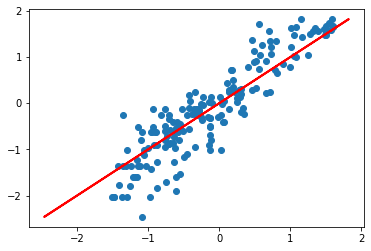

In [142]:
plt.scatter(pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

# Saving The Model

In [143]:
#Saving the model using .pkl
import joblib
joblib.dump(Final_model,"GlobalPowerGEN.pkl")

['GlobalPowerGEN.pkl']

# Prediction with Test Dataset

In [144]:
#Loading the saved model
model=joblib.load("GlobalPowerGEN.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([-0.7038424 , -0.14541748,  1.16932811, -0.42026138,  1.54231053,
       -0.5985445 , -0.33651569,  0.33504974, -0.11746947, -1.15144982,
        0.5547903 , -1.00382298, -0.87319788, -0.8129314 ,  1.58150523,
        1.01484096,  0.19486215,  1.50547722, -0.12449222,  0.78238903,
        0.80525657, -0.72935923,  0.10498801,  0.16422549, -0.28313179,
       -1.5076667 , -0.23125716, -0.65099193, -0.28707131,  1.52072909,
       -0.13098712, -0.75501154,  0.31019532,  0.49097974,  0.22741699,
       -0.41634462, -0.76534674, -0.12557188, -0.55785685,  0.1437206 ,
       -0.71309877,  0.2522413 , -0.90275854,  0.27782061,  0.29466297,
       -0.24172357, -0.60942456, -0.35557468, -0.15634763,  0.34884912,
       -0.69431016, -1.48263694, -1.08137318, -1.30053542, -0.76340966,
       -0.42446038,  0.19776043, -1.25679837, -0.56958311, -1.35214715,
       -1.24434243,  1.47873261, -0.33718472,  0.52369128,  0.71270626,
       -1.10461999, -0.12479037,  0.90486672, -1.10996096,  0.04

In [145]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
Predicted,-0.703842,-0.145417,1.169328,-0.420261,1.542311,-0.598544,-0.336516,0.335050,-0.117469,-1.151450,...,-0.547506,1.054916,-0.872779,-0.609973,-1.485615,0.716531,-0.252265,0.564571,-0.456459,-0.137480
Actual,-0.886429,0.026322,1.430497,0.188634,1.728867,-0.414861,0.253379,-0.096185,0.131637,-1.224315,...,-0.530294,1.473388,-1.847415,-1.894509,-2.031653,0.253379,-0.307017,1.713273,-1.098648,-0.908451


Achieved the pedicted values near the Actual values.

# Now COnsidering Primary_fuel as Target

# Dividing data into input and Target

In [146]:
X=dfn.drop(['primary_fuel'],axis=1)
Y=dfn['primary_fuel']

In [147]:
X.shape

(884, 11)

In [148]:
Y.shape

(884,)

# Splitting Data into Train and Test data

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [151]:
# To Find the best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(X_train,Y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.6497175141242938 on Random State = 175


In [152]:
#selecting Random State 175

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=175,test_size=.20)

In [153]:
#importing all reuired machine learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [154]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [155]:
#Trying different algorithms for training & testing
for i in model:
    i.fit(X_train,Y_train)
    i.score(X_train,Y_train)
    pred= i.predict(X_test)
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,pred)*100)
    print('Confusion Matrix of ',i,' is \n', confusion_matrix(Y_test,pred) )
    print(classification_report(Y_test,pred))
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 64.97175141242938
Confusion Matrix of  LogisticRegression()  is 
 [[ 6  8  0  0  0  0  2  0]
 [ 1 26  0 12  0  0  2  1]
 [ 0  2  0  6  0  0  0  5]
 [ 0  1  0 37  0  0  0  8]
 [ 0  0  0  0  0  0  0  1]
 [ 0  0  0  1  0  0  1  0]
 [ 1  3  0  1  0  0 26  1]
 [ 0  0  0  5  0  0  0 20]]
              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.65      0.62      0.63        42
           2       0.00      0.00      0.00        13
           3       0.60      0.80      0.69        46
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.84      0.81      0.83        32
           7       0.56      0.80      0.66        25

    accuracy                           0.65       177
   macro avg       0.42      0.43      0.41       177
weighted avg       0.61      0.65      0.62       177

Accuracy_Score of  Ridg

Gradient Boosting Classifier gave an accuracy of 93.220, Lets check for CV score

# CrossValidation

In [156]:
from sklearn.model_selection import cross_val_score

for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,i.predict(X_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 64.97175141242938
cross Validation accuracy score of  LogisticRegression()  is  54.410631741140215
Accuracy_Score of  RidgeClassifier() is 74.01129943502825
cross Validation accuracy score of  RidgeClassifier()  is  73.19080636877247
Accuracy_Score of  DecisionTreeClassifier() is 85.87570621468926
cross Validation accuracy score of  DecisionTreeClassifier()  is  84.27452491011813
Accuracy_Score of  SVC() is 25.98870056497175
cross Validation accuracy score of  SVC()  is  28.39432460195172
Accuracy_Score of  KNeighborsClassifier() is 68.92655367231639
cross Validation accuracy score of  KNeighborsClassifier()  is  75.11106831022086
Accuracy_Score of  RandomForestClassifier() is 89.83050847457628
cross Validation accuracy score of  RandomForestClassifier()  is  88.57473035439139
Accuracy_Score of  SGDClassifier() is 7.909604519774012
cross Validation accuracy score of  SGDClassifier()  is  20.4705957883924
Accuracy_Score of  BaggingClassifier() 

Random Forest Classifier got the cross validation difference of only 1.3%, So we can continue with RFC

# Hyper parameter tuning For RFClassifier

In [157]:
n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # minimum  no of samples rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #minimum no of samples required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [158]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 1890 candidates, totalling 9450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 64, 118, 173, 227, 282, 336],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             verbose=2)

In [159]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=118, min_samples_split=3, n_estimators=200)

In [160]:
grid_search.best_params_

{'max_depth': 118,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [161]:
GCV_pred=grid_search.best_estimator_.predict(X_test)
accuracy_score(Y_test,GCV_pred)

0.8983050847457628

In [164]:
print("CLASSIFICATION REPORT::\n",classification_report(Y_test,GCV_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.86      0.86      0.86        42
           2       0.71      0.38      0.50        13
           3       0.81      0.93      0.87        46
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        25

    accuracy                           0.90       177
   macro avg       0.80      0.77      0.78       177
weighted avg       0.89      0.90      0.89       177



<AxesSubplot:>

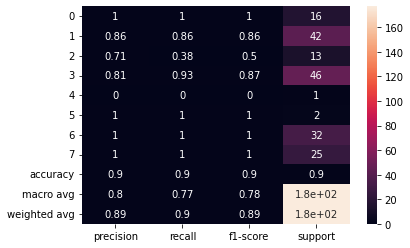

In [165]:
clsf_repo = classification_report(Y_test,GCV_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [166]:
from sklearn.metrics import roc_auc_score

In [169]:
Y_prob = grid_search.best_estimator_.fit(X_train,Y_train).predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, Y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, Y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, Y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, Y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.968768 (macro),
0.970832 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.975600 (macro),
0.989904 (weighted by prevalence)


# Saving Model:

In [170]:
import joblib
joblib.dump(GCV_pred,"GlobalPowerFuel.pkl")

['GlobalPowerFuel.pkl']

In [175]:
from joblib import dump, load

In [176]:
dump(GCV_pred, 'GlobalPowerFuel.joblib')

['GlobalPowerFuel.joblib']

In [177]:
clf_loaded = load('GlobalPowerFuel.joblib')

In [178]:
Y_pred = clf_loaded.predict(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'